# Your Task

__FROM:__ Guido Rossum<br>
__Subject:__ Building the Models

Hi,

Now that you have successfully imported, prepared and explored the data you are ready to start exploring some possible tools for your analysis. When you worked in R you used the caret package for many of your machine learning and data mining tasks. Python has a similar library called Sci-Kit Learn that the client has specifically asked us to use because it is likely to be compatible a custom software solution they plan to deploy.

In this task you’ll build your models just as you have done previously, but with a different set of tools. As you progress remember the following:

1. Let the data tell the story – don't make any assumptions.
2. It is often best to build three or more models and compare the results.
3. Make sure you have chosen the correct tools for the type of data you have.

I suggest you start this task with a quick orientation on Sci-Kit Learn to become familiar with the benefits of using it and how to use it effectively for this project. 

GR 

Guido Rossum
Senior Data Scientist
Credit One
www.creditonellc.com

# Introduction

Now that you have properly prepared and thoroughly explored the data it's time to begin the modeling process. Throughout this task will examine feature selection and model building through the use of the Python module called Sci-Kit Learn. Is very important for you to understand that this task uses the CreditOne data in a regression type problem, but your final analysis will be centered on classification. The steps will be very similar, but you will need to replicate and them in a different way and obviously on different features and variables. Let's get started with an introduction to Sci-Kit Learn and how it differs from what you've already done with caret and R.

# Install Libs

In [1]:
!pip install imblearn
!pip install JLpyUtils==0.2.2

import IPython
IPython.display.clear_output()

# Import Libs

In [2]:
import sys, os, warnings, importlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import scipy
import sklearn, sklearn.preprocessing, sklearn.linear_model, sklearn.datasets, sklearn.tree, sklearn.svm, sklearn.metrics, sklearn.ensemble, sklearn.model_selection
import imblearn

/opt/conda/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/opt/conda/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/opt/conda/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/opt/conda/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:519: FutureWarning: Passing (type, 1) or 

In [4]:
import JLpyUtils
JLpyUtils.__version__

You are in development mode. Using local copy of JLpyUtils from the repo


'0.2.2'

In [6]:
pd.options.display.max_columns = 1000
mpl.rcParams['font.size'] = 14

# Selecting and Dividing the Data

## Introduction to Sci-Kit Learn

You have already installed the Sci-Kit Learn library on your machine so take a few minutes and come up to speed on how to use it. As you'll see it is not very different from using caret in R, but there are a few key differences, specifically:

1. It is much faster than caret in R
2. The pipeline is easier to work with
3. Models can easily be serialized for deployment 
4. More more metrics are available
5. Feature and variable selection is in the form of indices
6. Data is stored and accessed in arrays consisting of samples and features

## Data Structure

Import the data 'default of credit card clients.csv' data

In [7]:
path_data_file = '../C05T01_Get_Started_With_Data_Science_and_Python/default of credit card clients.csv'
path_report_folder = './outputs'

df = pd.read_csv(path_data_file, header = 1)

display(df.head())
display(df.info())

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
ID                            30000 non-null int64
LIMIT_BAL                     30000 non-null int64
SEX                           30000 non-null int64
EDUCATION                     30000 non-null int64
MARRIAGE                      30000 non-null int64
AGE                           30000 non-null int64
PAY_0                         30000 non-null int64
PAY_2                         30000 non-null int64
PAY_3                         30000 non-null int64
PAY_4                         30000 non-null int64
PAY_5                         30000 non-null int64
PAY_6                         30000 non-null int64
BILL_AMT1                     30000 non-null int64
BILL_AMT2                     30000 non-null int64
BILL_AMT3                     30000 non-null int64
BILL_AMT4                     30000 non-null int64
BILL_AMT5                     30000 non-null int64
BILL_AMT6               

None

## Selecting the Data

Select the features

In [8]:
headers_dict = {}
headers_dict['features'] = list(df.iloc[:,12:23].columns)
headers_dict['labels'] = ['PAY_AMT6']

display(headers_dict)

{'features': ['BILL_AMT1',
  'BILL_AMT2',
  'BILL_AMT3',
  'BILL_AMT4',
  'BILL_AMT5',
  'BILL_AMT6',
  'PAY_AMT1',
  'PAY_AMT2',
  'PAY_AMT3',
  'PAY_AMT4',
  'PAY_AMT5'],
 'labels': ['PAY_AMT6']}

In [9]:
X = df[headers_dict['features']]
y = df[headers_dict['labels']]

In [10]:
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X,y)
print('X_train.shape',X_train.shape)
print('y_train.shape',y_train.shape)

X_train.shape (22500, 11)
y_train.shape (22500, 1)


## Building the Models and Choosing the Right Model

<font color='red'> Since I am already very familiar with sklearn, instead of following the exact details in the plan of attack, we will just leverage the custom python package I typically use for ML: [JLpy_utils_package](https://github.com/jlnerd/JLpy_utils_package)

### Fetch Models Dict

In [11]:
n_features = len(headers_dict['features'])
n_labels = len(headers_dict['labels'])
models=['Linear', 'SVM', 'KNN', 'DecisionTree', 'RandomForest', 'GradBoost', 'DenseNet']
print('models:',models)

models_dict = JLpyUtils.ML.model_selection.default_models_dict.regression(n_features, n_labels, models)

models: ['Linear', 'SVM', 'KNN', 'DecisionTree', 'RandomForest', 'GradBoost', 'DenseNet']


<font color='red'> Above, we see all the models we will evaluate against each other. Each model type of model is defined by a model_dict, which contains the model object itself (i.e. sklearn.tree.RandomForestRegressor()) and a param_grid, which defines some default/typical hyperparameters we will run a grid search across to find the best configuration for the particular model of interest

#### Reduce Size of param grid for some models

In [12]:
models_dict['SVM']['param_grid']['kernel'] = ['rbf', 'sigmoid']

display(models_dict['SVM']['param_grid'])

{'kernel': ['rbf', 'sigmoid']}

In [13]:
for param in ['initial_dense_unit_size', 'dense_scaling_factor', 'activation', 'batch_norm_rate', 'dropout_rate']:
    models_dict['DenseNet']['param_grid'][param] = [models_dict['DenseNet']['param_grid'][param][0]]
    
display(models_dict['DenseNet']['param_grid'])

{'n_features': [11],
 'n_labels': [1],
 'batch_size': [None],
 'layers_per_group': [1, 2],
 'initial_dense_unit_size': [11],
 'dense_scaling_factor': [1.5],
 'activation': ['elu'],
 'final_activation': ['elu'],
 'batch_norm_rate': [None],
 'dropout_layer_rate': [None, 1, 2],
 'dropout_rate': [0.1],
 'loss': [<function tensorflow.python.keras.losses.mean_squared_error(y_true, y_pred)>],
 'learning_rate': [0.001],
 'optimizer': [tensorflow.python.keras.optimizer_v2.adam.Adam],
 'metrics': [['mse']]}

### Run Grid Search CV

In [14]:
metrics = {'MSE':sklearn.metrics.mean_squared_error,
           'r2_score': sklearn.metrics.r2_score}

GridSearchCV = JLpyUtils.ML.model_selection.GridSearchCV( models_dict,
                                                cv=5,
                                                retrain=False,
                                                metrics= metrics,
                                                path_root_dir='./outputs/GridSearchCV',
                                                n_jobs=-1,
                                                verbose = 2,
                                            )
GridSearchCV.fit(X_train, y_train,
                X_test, y_test)


---- Linear ----
path_model_dir: ./outputs/GridSearchCV/Linear
	best_cv_score: 0.12470468324977986
	best_pred_score: 0.13361353409211008
	 MSE : 262926441.41657093
	 r2_score : 0.13361353409211008

---- SVM ----
path_model_dir: ./outputs/GridSearchCV/SVM
	best_cv_score: -0.04429861679482485
	best_pred_score: -0.04094857303981159
	 MSE : 315901638.32973915
	 r2_score : -0.04094857303981159

---- KNN ----
path_model_dir: ./outputs/GridSearchCV/KNN
	best_cv_score: 0.09950610845763329
	best_pred_score: 0.7612726206824733
	 MSE : 72447738.72002561
	 r2_score : 0.7612726206824733

---- DecisionTree ----
path_model_dir: ./outputs/GridSearchCV/DecisionTree
	best_cv_score: 0.053812170960929884
	best_pred_score: 0.1436387627539748
	 MSE : 259884037.36229092
	 r2_score : 0.1436387627539748

---- RandomForest ----
path_model_dir: ./outputs/GridSearchCV/RandomForest
	best_cv_score: 0.12109617166534101
	best_pred_score: 0.633220887753794
	 MSE : 111308210.0927885
	 r2_score : 0.633220887753794

---

# Make Prediction and Evaluating the Results

Now that you have chosen a model, let's use it to make predictions. 

Above we can see the R2 and MSE scores throughout the model GridSearch. The best model is the KNN, with an R2 of 0.718

In [15]:
_, df_metrics = JLpyUtils.ML.inspection.compare.model_metrics(GridSearchCV.models_dict, metrics)

,model,MSE,r2_score
0,KNN,7.244774e+07,0.761273
1,GradBoost,9.327915e+07,0.692630
2,RandomForest,1.113082e+08,0.633221
3,DecisionTree,2.598840e+08,0.143639
4,Linear,2.629264e+08,0.133614
5,SVM,3.159016e+08,-0.040949
6,DenseNet,3.276403e+08,-0.079629


In [16]:
model = GridSearchCV.models_dict[df_metrics['model'].iloc[0]]['best_model']
model

KNeighborsRegressor(algorithm='ball_tree', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=100, p=2,
                    weights='distance')

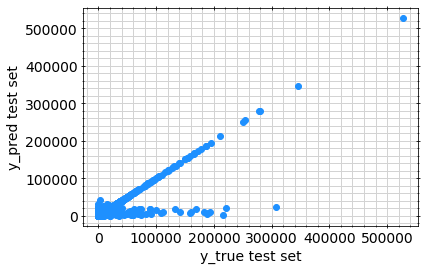

In [17]:
y_pred = model.predict(X_test)
JLpyUtils.ML.inspection.plot.true_vs_pred(y_test, y_pred, 'test set')

# The CreditOne Project and Writing Your Report

Now you are ready to dive into the CreditOne data and apply what you've already learned to a classification problem; much of the work you have already done can be applied to this last task so know you're not starting completely from the beginning. 

One of the main objectives that separates Data Science from Data Analytics is creative problem-solving skills and many times Data Scientists will have to learn new skills just to solve a problem; you'll be doing the same thing here and stretching your existing knowledge by learning things that you have not been introduced to yet to solve the problem at hand.

In addition to applying your new Python and Sci-Kit Learn skills you will also need to demonstrate that you can use the Sci-Kit Learn resources to perform some additional Data Science related skills. 

Here is the list of requirements that your data science process should include for your final report:

1. Cleaning and Pre-processing
2. Covariance Estimation
3. EDA
4. Feature Engineering (either PCA or RFE) and Dimensionality Reduction
5. One-Hot Encoding (if needed)
6. Classification (Build three model and choose the best)
7. Model Tuning (Tune at least two parameters for each model you build)
8. Model Evaluation

# Final Pipe

## Load Data

In [12]:
path_data_file = '../C05T01_Get_Started_With_Data_Science_and_Python/default of credit card clients.csv'
path_report_folder = './outputs'

df = pd.read_csv(path_data_file, header = 1)
display(df.info())

display(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
ID                            30000 non-null int64
LIMIT_BAL                     30000 non-null int64
SEX                           30000 non-null int64
EDUCATION                     30000 non-null int64
MARRIAGE                      30000 non-null int64
AGE                           30000 non-null int64
PAY_0                         30000 non-null int64
PAY_2                         30000 non-null int64
PAY_3                         30000 non-null int64
PAY_4                         30000 non-null int64
PAY_5                         30000 non-null int64
PAY_6                         30000 non-null int64
BILL_AMT1                     30000 non-null int64
BILL_AMT2                     30000 non-null int64
BILL_AMT3                     30000 non-null int64
BILL_AMT4                     30000 non-null int64
BILL_AMT5                     30000 non-null int64
BILL_AMT6               

None

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0


## Define Headers Dict

In [13]:
headers_dict = {}
headers_dict['features'] = list(df.drop(columns = ['ID','default payment next month']))
headers_dict['categorical features'] = ['SEX', 'EDUCATION', 'MARRIAGE']#, 
                                        #'PAY_0','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6']
headers_dict['continuous features'] = [feature for feature in headers_dict['features'] if feature not in headers_dict['categorical features']]
headers_dict['labels'] = ['default payment next month']
headers_dict

{'features': ['LIMIT_BAL',
  'SEX',
  'EDUCATION',
  'MARRIAGE',
  'AGE',
  'PAY_0',
  'PAY_2',
  'PAY_3',
  'PAY_4',
  'PAY_5',
  'PAY_6',
  'BILL_AMT1',
  'BILL_AMT2',
  'BILL_AMT3',
  'BILL_AMT4',
  'BILL_AMT5',
  'BILL_AMT6',
  'PAY_AMT1',
  'PAY_AMT2',
  'PAY_AMT3',
  'PAY_AMT4',
  'PAY_AMT5',
  'PAY_AMT6'],
 'categorical features': ['SEX', 'EDUCATION', 'MARRIAGE'],
 'continuous features': ['LIMIT_BAL',
  'AGE',
  'PAY_0',
  'PAY_2',
  'PAY_3',
  'PAY_4',
  'PAY_5',
  'PAY_6',
  'BILL_AMT1',
  'BILL_AMT2',
  'BILL_AMT3',
  'BILL_AMT4',
  'BILL_AMT5',
  'BILL_AMT6',
  'PAY_AMT1',
  'PAY_AMT2',
  'PAY_AMT3',
  'PAY_AMT4',
  'PAY_AMT5',
  'PAY_AMT6'],
 'labels': ['default payment next month']}

## Select X y slices

In [14]:
X = df[headers_dict['features']]
y = df[headers_dict['labels']]

## Plot Stats

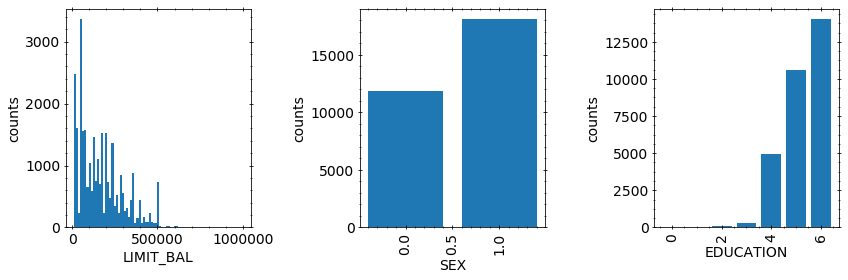

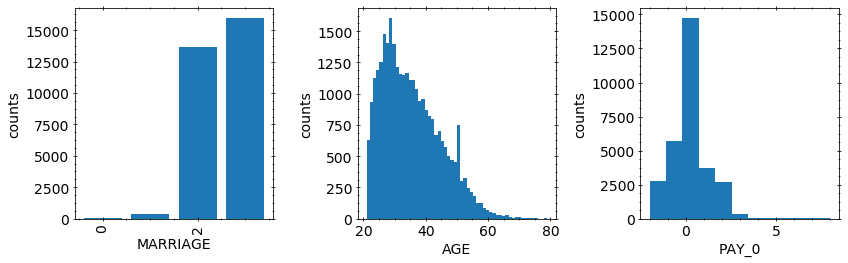

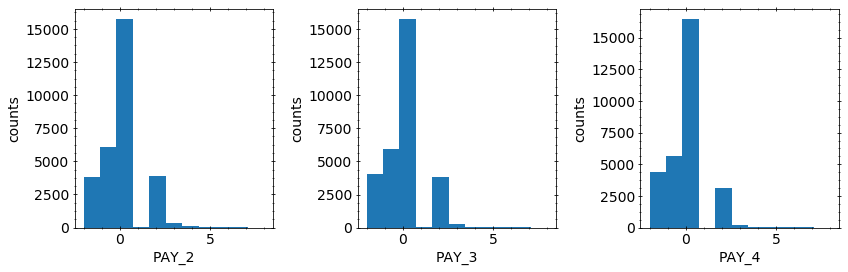

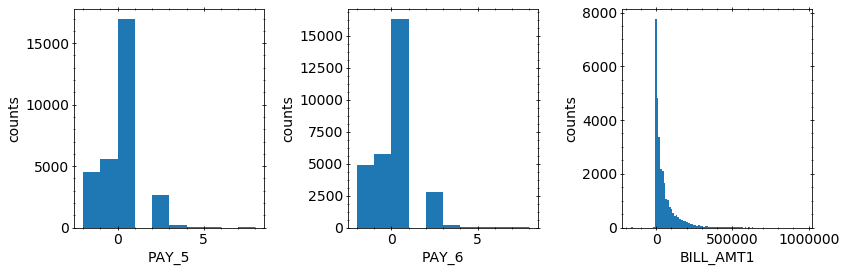

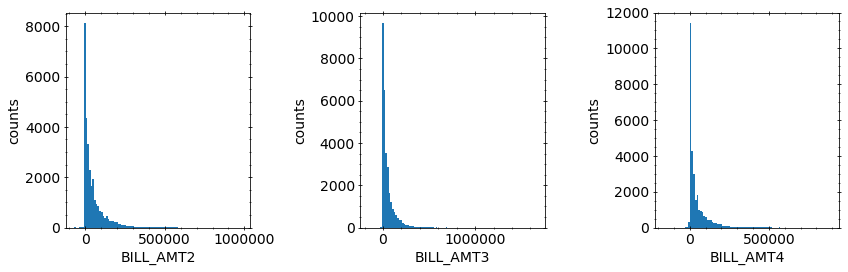

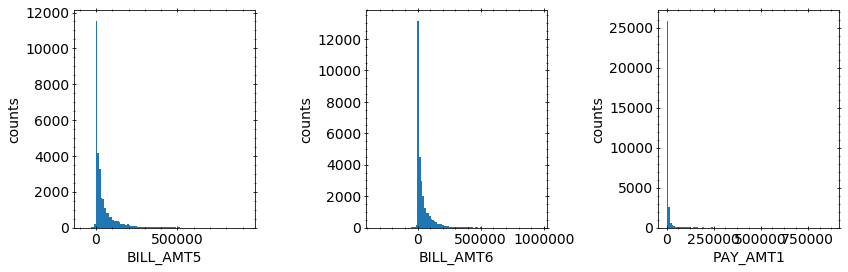

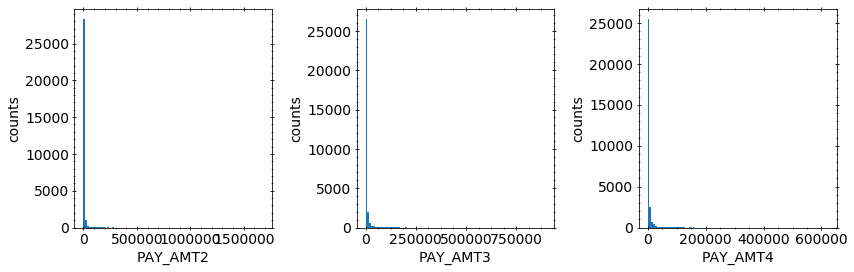

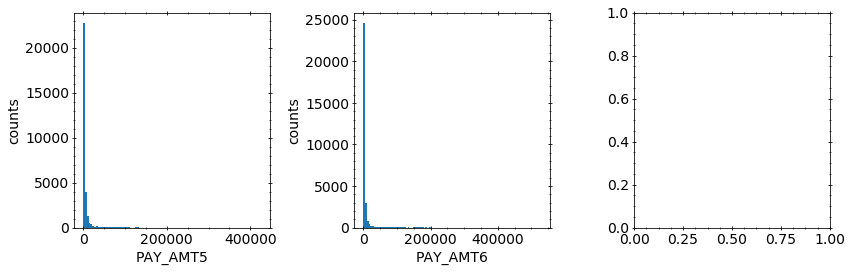

In [21]:
JLpyUtils.plot.hist_or_bar(X, categorical_headers = headers_dict['categorical features'])

In [206]:
importlib.reload(JLpyUtils.plot)

<module 'JLpyUtils.plot' from '/mr3_boltprod_john_t_leonard/Data_Science_Projects./JLpyUtils/JLpyUtils/plot.py'>

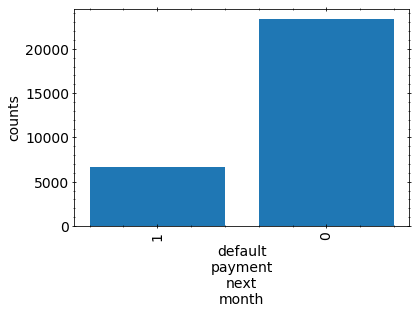

In [208]:
JLpyUtils.plot.hist_or_bar(y, categorical_headers=headers_dict['labels'], n_plot_columns=1)

In [209]:
print('percentages:')
y.iloc[:,0].value_counts()/(np.sum(y.iloc[:,0].value_counts()))*100

percentages:


0    77.88
1    22.12
Name: default payment next month, dtype: float64

## Feature Engineer

In [15]:
# instantiate the feature engineering pipe
path_report_dir = '.'
feat_eng_pipe = JLpyUtils.ML.preprocessing.feat_eng_pipe(path_report_dir=path_report_dir,
                                         verbose=1, overwrite=False)

In [16]:
#define feature engineering pipe parameters
import sklearn.preprocessing
feat_eng_pipe.Scalers_dict = {'RobustScaler': sklearn.preprocessing.RobustScaler()}
feat_eng_pipe.Imputer_categorical_dict = {'most_frequent':{None:None}}
feat_eng_pipe.Imputer_continuous_dict = {'median':{None:None}}
feat_eng_pipe.OneHot_cases = [True]

In [17]:
print('feat_eng_pipe.path_feat_eng_root_dir:',feat_eng_pipe.path_feat_eng_root_dir)

feat_eng_pipe.path_feat_eng_root_dir: ./outputs/feat_eng


In [18]:
#run the pipe
feat_eng_pipe.fit(X, headers_dict=headers_dict, format_ = 'csv')

-------------------------------- fit feat_eng_pipe --------------------------------
LabelEncode
	Scale: RobustScaler
		Impute Categorical Features: most_frequent [ None ]
			Impute Continuous Features: median [ None ]
				One Hot Encode: [ True ]
------------------------------------ !Finished! ------------------------------------


### Select Feat Eng Case of Interest & Inspect the save Files

In [19]:
path_feat_eng_dir = feat_eng_pipe.path_feat_eng_dirs[0]
os.listdir(path_feat_eng_dir)

['X.csv', 'OneHotEncoder.dill', 'headers_dict.json', 'GridSearchCV']

## Further Feature Engineering

In [20]:
headers_dict = feat_eng_pipe.load('headers_dict','json', path_feat_eng_dir)
headers_dict.keys()

dict_keys(['features', 'categorical features', 'continuous features', 'labels', 'headers after OneHot'])

In [21]:
X = feat_eng_pipe.load('X', 'csv', path_feat_eng_dir, headers= headers_dict['headers after OneHot'])
X.head()

,LIMIT_BAL,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,SEX[1],SEX[2],EDUCATION[0],EDUCATION[1],EDUCATION[2],EDUCATION[3],EDUCATION[4],EDUCATION[5],EDUCATION[6],MARRIAGE[0],MARRIAGE[1],MARRIAGE[2],MARRIAGE[3]
0,-0.631579,-0.769231,2.0,2.0,-1.0,-1.0,-2.0,-2.0,-0.290695,-0.296584,-0.337391,-0.365126,-0.373848,-0.356074,-0.524214,-0.316775,-0.437424,-0.403524,-0.396930,-0.386374,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,-0.105263,-0.615385,-1.0,2.0,0.0,0.0,0.0,2.0,-0.310071,-0.319150,-0.302730,-0.302419,-0.302504,-0.288055,-0.524214,-0.242141,-0.194411,-0.134508,-0.396930,0.128791,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,-0.263158,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.107937,-0.117549,-0.113559,-0.090477,-0.065180,-0.031747,-0.145282,-0.122150,-0.194411,-0.134508,-0.132310,0.901539,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,-0.473684,0.230769,0.0,0.0,0.0,0.0,0.0,0.0,0.387339,0.443008,0.507883,0.177504,0.224139,0.260230,-0.024963,0.002400,-0.145808,-0.107606,-0.114051,-0.128791,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,-0.473684,1.769231,-1.0,0.0,-1.0,0.0,0.0,0.0,-0.216654,-0.254500,0.273859,0.036183,0.021506,0.042968,-0.024963,8.320614,1.992710,2.017621,-0.214607,-0.211475,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


<font color = 'red'> Since our feature engineering involved scaling the data, we can just use a correlation coeff. threshold method to filter cross-correlated features, instead of the covariance coeffience, since covariance is used to measure variables that have different units of measurement.

In [22]:
AbsCorrCoeff_threshold=0.95
CorrelationCoeffThreshold = JLpyUtils.ML.preprocessing.CorrelationCoeffThreshold(AbsCorrCoeff_threshold)
CorrelationCoeffThreshold.fit(X)

print('dropped_features_dict:\n',CorrelationCoeffThreshold.dropped_features_dict)

dropped_features_dict:
 {'dropped feature': ['BILL_AMT2', 'SEX[2]', 'MARRIAGE[2]'], 'correlated feature': ['BILL_AMT1', 'SEX[1]', 'MARRIAGE[1]'], 'corr coeff': [0.9514836727518029, -1.0, -0.9750330059585367]}


In [23]:
X = CorrelationCoeffThreshold.transform(X)

<font color='red'> Above, we can see we have dropped 3 features ```['BILL_AMT2', 'SEX[2]', 'MARRIAGE[2]']``` based on their absolute cross correlation with ```['BILL_AMT1', 'SEX[1]', 'MARRIAGE[1]']``` being >= 0.95

## Train Test Split

In [138]:
random_state = 0
test_size = 0.3
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size = test_size, random_state =random_state)

## Class Balance

<font color='red'> To ensure our models don't perferntially predict one class over another, we run random oversampling on the training set to balance the classes

In [139]:
RandomOverSampler = imblearn.over_sampling.RandomOverSampler()
X_train, y_train = RandomOverSampler.fit_resample(X_train,y_train)
X_train = pd.DataFrame(X_train, columns = list(X.columns))
y_train = pd.DataFrame(y_train, columns = list(y.columns))

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


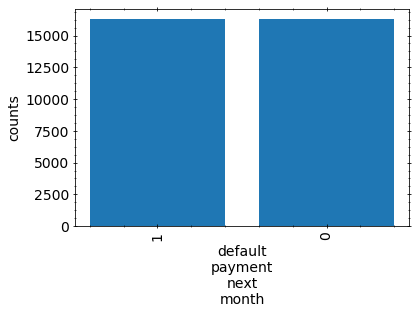

In [210]:
JLpyUtils.plot.hist_or_bar(y_train, categorical_headers=[y_train.columns], n_plot_columns=1)

## Model Selection

In [27]:
n_features = X.shape[1]
n_labels = y.shape[1]
print('n_features:',n_features)
print('n_labels:',n_labels)

n_features: 30
n_labels: 1


In [28]:
models=['Logistic', 'SVM', 'KNN', 'DecisionTree', 'RandomForest']
models

['Logistic', 'SVM', 'KNN', 'DecisionTree', 'RandomForest']

In [29]:
importlib.reload(JLpyUtils.ML)
importlib.reload(JLpyUtils.ML.NeuralNet.DenseNet)
importlib.reload(JLpyUtils.ML.NeuralNet.search)
importlib.reload(JLpyUtils.ML.model_selection)
importlib.reload(JLpyUtils.ML.model_selection.default_models_dict)

<module 'JLpyUtils.ML.model_selection.default_models_dict' from '/mr3_boltprod_john_t_leonard/Data_Science_Projects./JLpyUtils/JLpyUtils/ML/model_selection/default_models_dict.py'>

In [30]:
models_dict = JLpyUtils.ML.model_selection.default_models_dict.classification(n_features, 
                                                                                n_labels, 
                                                                                models)

In [32]:
#reduce param space for dense net
# params_to_keep = ['layers_per_group', 'dense_scaling_factor', 'dropout_layer_rate', 'dropout_rate']
# for key in models_dict['DenseNet']['param_grid'].keys():
#     if key not in params_to_keep:
#         models_dict['DenseNet']['param_grid'][key] = [models_dict['DenseNet']['param_grid'][key][0]]

In [33]:
for key in models_dict.keys():
    print('\n'+key,'param_grid:')
    display(models_dict[key]['param_grid'])


Logistic param_grid:


{'penalty': ['l1', 'l2']}


SVM param_grid:


{'kernel': ['rbf', 'sigmoid']}


DecisionTree param_grid:


{'criterion': ['mse', 'friedman_mse', 'mae'],
 'splitter': ['best', 'random'],
 'max_depth': [None, 5, 10, 100],
 'max_features': [None, 0.25, 0.5, 0.75]}


RandomForest param_grid:


{'criterion': ['gini', 'entropy'],
 'n_estimators': [10, 100],
 'max_depth': [None, 5, 10],
 'max_features': [None, 0.25, 0.5, 0.75]}

In [34]:
path_root_dir = os.path.join(path_feat_eng_dir,'GridSearchCV')
print('path_root_dir:',path_root_dir)

path_root_dir: ./outputs/feat_eng/LabelEncode/Scaler_ID[RobustScaler]/Imputer_categorical_ID[most_frequent]/Imputer_iterator_classifier_ID[None]/Imputer_continuous_ID[median]/Imputer_iterator_regressor_ID[None]/OneHot_case[True]/GridSearchCV


In [35]:
metrics = {'accuracy':sklearn.metrics.accuracy_score,
           'precision':sklearn.metrics.precision_score,
           'recall':sklearn.metrics.recall_score,
           'f1_score':sklearn.metrics.f1_score,
           'auc':sklearn.metrics.roc_auc_score
           }
GridSearchCV = JLpyUtils.ML.model_selection.GridSearchCV(models_dict, 
                                                         cv=4, 
                                                         scoring=None, 
                                                         metrics = metrics, 
                                                         retrain=False, 
                                                         path_root_dir=path_root_dir, 
                                                         n_jobs=-1, verbose=2)

In [38]:
GridSearchCV.fit(X_train, y_train, X_test, y_test)


---- Logistic ----
path_model_dir: ./outputs/feat_eng/LabelEncode/Scaler_ID[RobustScaler]/Imputer_categorical_ID[most_frequent]/Imputer_iterator_classifier_ID[None]/Imputer_continuous_ID[median]/Imputer_iterator_regressor_ID[None]/OneHot_case[True]/GridSearchCV/Logistic
	best_cv_score: 0.672779685966634
	best_pred_score: 0.6892222222222222
	 accuracy : 0.6892222222222222
	 precision : 0.3714371437143714
	 recall : 0.6381443298969072
	 f1_score : 0.4695619192110753
	 auc : 0.6707010601325896

---- SVM ----
path_model_dir: ./outputs/feat_eng/LabelEncode/Scaler_ID[RobustScaler]/Imputer_categorical_ID[most_frequent]/Imputer_iterator_classifier_ID[None]/Imputer_continuous_ID[median]/Imputer_iterator_regressor_ID[None]/OneHot_case[True]/GridSearchCV/SVM
	best_cv_score: 0.7327036310107949
	best_pred_score: 0.781
	 accuracy : 0.781
	 precision : 0.49305244285073957
	 recall : 0.5670103092783505
	 f1_score : 0.5274514504914889
	 auc : 0.7034060044975322

---- DecisionTree ----
path_model_dir: 

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 30 concurrent workers.
[Parallel(n_jobs=-1)]: Done 140 tasks      | elapsed:    3.7s
[Parallel(n_jobs=-1)]: Done 384 out of 384 | elapsed:  5.3min finished


	best_cv_score: 0.32479358400824265
	best_pred_score: -0.6414532285856134
	 accuracy : 0.7224444444444444
	 precision : 0.3600802407221665
	 recall : 0.37010309278350517
	 f1_score : 0.3650228774783935
	 auc : 0.5946832744370784

---- RandomForest ----
path_model_dir: ./outputs/feat_eng/LabelEncode/Scaler_ID[RobustScaler]/Imputer_categorical_ID[most_frequent]/Imputer_iterator_classifier_ID[None]/Imputer_continuous_ID[median]/Imputer_iterator_regressor_ID[None]/OneHot_case[True]/GridSearchCV/RandomForest
	best_cv_score: 0.9398000490677134
	best_pred_score: 0.8112222222222222
	 accuracy : 0.8112222222222222
	 precision : 0.5868781542898341
	 recall : 0.4195876288659794
	 f1_score : 0.48932972648031264
	 auc : 0.6692130778890804


## Compare Models

In [39]:
_, df_metrics = JLpyUtils.ML.inspection.compare.model_metrics(GridSearchCV.models_dict, metrics)

,model,accuracy,precision,recall,f1_score,auc
0,Logistic,0.689222,0.371437,0.638144,0.469562,0.670701
1,DecisionTree,0.722444,0.360080,0.370103,0.365023,0.594683
2,SVM,0.781000,0.493052,0.567010,0.527451,0.703406
3,RandomForest,0.811222,0.586878,0.419588,0.489330,0.669213


In [40]:
best_model_ID = df_metrics.iloc[-1,:]['model']
best_model_ID

'RandomForest'

In [42]:
model = GridSearchCV.models_dict[best_model_ID]['best_model']
model

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features=0.25, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

## Inspect Best Model

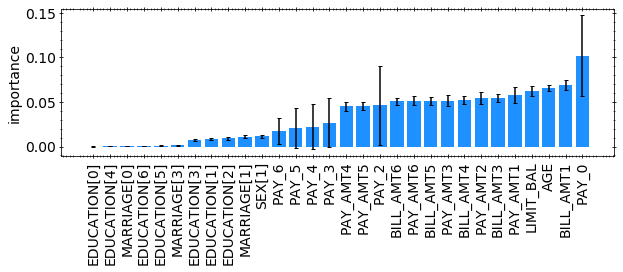

In [79]:
JLpyUtils.ML.inspection.plot.feature_importance(model, 
                                                best_model_ID, 
                                                X.columns, 
                                                max_labels=50,
                                                tight_layout_rect=(0,0,1.5,1))

<font color='red'> In the bar chart above, we can see the 3 most important features contributing to credit default are PAY\_0, BILL\_AMT1, and AGE.

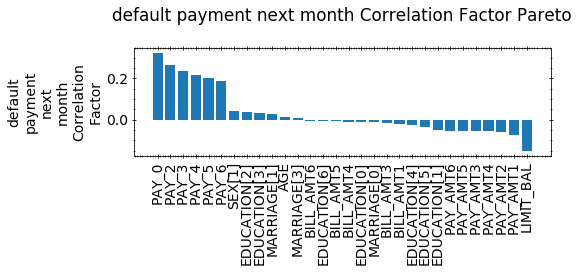

In [88]:
Xy = pd.concat((X,y),axis=1)
JLpyUtils.plot.corr_pareto(Xy.corr(), 'default payment next month', rect=(0,0,1.5,1))

<font color='red'> By inspecting the correlation coeff. for each of these features we can observe that a higher PAY\_0 ammount implies a higher likelyhood of default. A lower Bill\_AMT1 implies a higher risk of default. Finally, older people are generally more likely to default on payments. It should be noted that the statements above are general guided principles, since there are obviously many features that contribute to a persons risk of default, and thus the model should be used for a more accurate assessment of an individuals risk. 

Confusion matrix, without normalization
[[6487  573]
 [1126  814]]


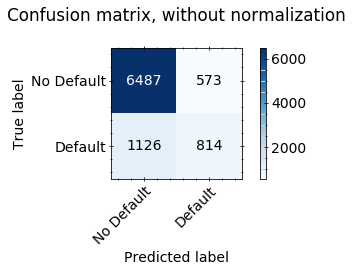

In [241]:
y_pred = model.predict(X_test)
JLpyUtils.ML.inspection.plot.confusion_matrix(y_test, y_pred, classes=['No Default','Default'])

# Maximize Success

<font color='red'> If we were to use the model to exclude all persons the model predicts who will default, then the potential improvement our model offers can be analyzed by considering the first column in the confusion matrix (i.e. the counts for TP and FN predictions)
    
More speficially, the % of correct predictions our model will make will be defined by the precision of our No Default prediction

In [283]:
classification_report = sklearn.metrics.classification_report(y_test, y_pred, output_dict=True)
No_Default_precision = classification_report['0']['precision']
print('No_Default_precision:',round(No_Default_precision,3))
print('1-No_Default_precision:',round(1-No_Default_precision,3))

No_Default_precision: 0.852
1-No_Default_precision: 0.148


<font color='red'> This implies ~15% of the time we will have someone default when we use the model to maximize success. We can compare this to present situation by inspecting the % of default currently occuring

In [286]:
y['default payment next month'].value_counts()/np.sum(y['default payment next month'].value_counts())

0    0.7788
1    0.2212
Name: default payment next month, dtype: float64

<font color = 'red'> Here, we see ~22% of the cases are defaults. Thus, our lift for the model can be estimated as the % of defaults when using the model vs. the % of defaults when not using the model

In [287]:
lift = 0.2212/0.148
print('lift:',lift)

lift: 1.4945945945945946


In [309]:
importlib.reload(JLpyUtils.ML.inspection.maximize_success)

<module 'JLpyUtils.ML.inspection.maximize_success' from '/mr3_boltprod_john_t_leonard/Data_Science_Projects./JLpyUtils/JLpyUtils/ML/inspection/maximize_success.py'>

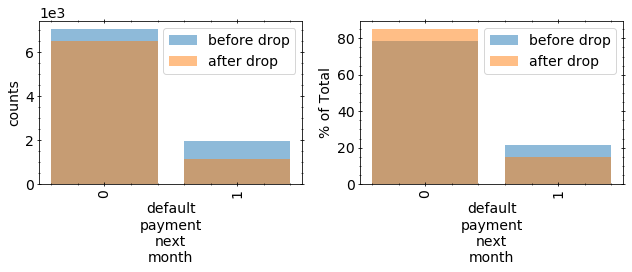

,default payment next month,lift
0,1,1.457393


,default payment next month,counts,% of Total
0,0,7060,78.444444
1,1,1940,21.555556


,default payment next month,counts,% of Total
0,0,6487,85.20951
1,1,1126,14.79049


In [310]:
drop_label_categories=[1] # a value of 1 implies a default payment, so we wish to drop these customers
df_lift, _, _, y_test_value_counts, y_drop_value_counts = JLpyUtils.ML.inspection.maximize_success.dropping_label_categories(model, X_test, y_test, drop_label_categories=[1])

display(df_lift)
display(y_test_value_counts)
display(y_drop_value_counts)


<font color = 'red'> Based on the results above, if we decide to drop/deny any customers who the model predicts will default on their loan, we can reduce the number of defaults by ~1.5X (from 22% to 15%)

# Prepare Your Report

__This task requires that you prepare one deliverable and one Juypter Notebook:__

1. Customer Default Identification Report that addresses:

Problem:
An increase in customer default rates is bad for Credit One since its business is approving customers for loans in the first place. This is likely to result in the loss of Credit One's business customers.

Questions to Investigate:

How do you ensure that customers can/will pay their loans?
Can we approve customers with high certainty?
As you progress through the task, begin thinking about how to solve the company's problem.

Here are some lessons the company learned from addressing a similar problem last year:

We cannot control customer spending habits
We cannot always go from what we find in our analysis to the underlying "why"
We must focus on the problems we can solve:
Which attributes in the data can we deem to be statistically significant to the problem at hand?
What concrete information can we derive from the data we have?
What proven methods can we use to uncover more information and why? 
Guido is expecting a report in a few days:
Your report should be a one to three page Word document that includes rules you believe provide insights, any relevant visualizations, and the answers to the company's questions.
It should also include any observations that you've made and any recommendations you might have, supported by evidence uncovered in your analysis.
2. Your Data Science work should be submitted as a Juypyter Notebook and in your GitHub account. 